In [20]:
import torch
from torch import nn
from d2l import torch as d2l

In [13]:
#@save
def show_heatmaps(matrices, xlabel, ylabel, titles=None, figsize=(2.5, 2.5),
                  cmap='Blues'):
    """显示矩阵热图"""
    d2l.use_svg_display()
    num_rows, num_cols = matrices.shape[0], matrices.shape[1]
    fig, axes = d2l.plt.subplots(num_rows, num_cols, figsize=figsize,
                                 sharex=True, sharey=True, squeeze=False)
    for i, (row_axes, row_matrices) in enumerate(zip(axes, matrices)):
        for j, (ax, matrix) in enumerate(zip(row_axes, row_matrices)):
            pcm = ax.imshow(matrix.detach().numpy(), cmap=cmap)
            if i == num_rows - 1:
                ax.set_xlabel(xlabel)
            if j == 0:
                ax.set_ylabel(ylabel)
            if titles:
                ax.set_title(titles[j])
    fig.colorbar(pcm, ax=axes, shrink=0.6);

tensor([[[[1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
          [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
          [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
          [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
          [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
          [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
          [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
          [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
          [0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
          [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]]]])


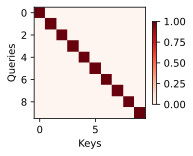

In [8]:
attention_weights = torch.eye(10).reshape((1, 1, 10, 10))
print(attention_weights)
show_heatmaps(attention_weights, xlabel='Keys', ylabel='Queries')

In [5]:

 import numpy as np
# 随机生成一个长度和宽度均为10的矩阵
matrix = np.random.rand(10, 10)
 
# 使用 softmax 运算确保每行都是有效的概率分布
matrix = np.exp(matrix) / np.sum(np.exp(matrix), axis=1, keepdims=True)
 
print(matrix)


[[0.11398487 0.11052505 0.07318033 0.05405218 0.12112614 0.08645312
  0.12433336 0.125999   0.06982585 0.12052012]
 [0.11796345 0.16229081 0.07266954 0.12908817 0.1181375  0.09835674
  0.06362287 0.0772953  0.09462628 0.06594933]
 [0.05813051 0.12111878 0.10549854 0.12204169 0.1049674  0.09793193
  0.06142889 0.14691773 0.10663676 0.07532777]
 [0.10418099 0.11528417 0.11303558 0.12964064 0.07567825 0.10037926
  0.08631164 0.0774065  0.10880128 0.08928169]
 [0.06172734 0.09192846 0.07633851 0.0964088  0.14290992 0.11708589
  0.11957653 0.07234096 0.09263817 0.12904542]
 [0.10411113 0.07678995 0.08113315 0.11095733 0.09842776 0.0648888
  0.10561716 0.11264909 0.13393492 0.1114907 ]
 [0.09736424 0.08415501 0.13689316 0.15550216 0.08444615 0.07672555
  0.09009904 0.07153003 0.09401958 0.10926509]
 [0.05350263 0.12369044 0.11576675 0.1253783  0.13502128 0.0888296
  0.08397893 0.11707606 0.06302179 0.09373423]
 [0.11099051 0.09819781 0.06534981 0.0862252  0.08320595 0.08120576
  0.14122384 0

In [16]:
# 可视化注意力权重
matrix = matrix.reshape((1,1,10,10))
show_heatmaps(matrix.detach(), xlabel='Keys', ylabel='Queries')

AttributeError: 'numpy.ndarray' object has no attribute 'detach'

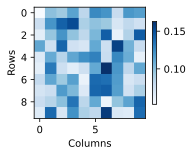

In [14]:
from torch.nn import functional as F
X = torch.rand((10,10))
X = F.softmax(X,dim=1)
X = X.reshape((1,1,10,10))
show_heatmaps(X,xlabel='Columns',ylabel='Rows')


In [17]:
n_train = 50  # 训练样本数
x_train, _ = torch.sort(torch.rand(n_train) * 5)   # 排序后的训练样本

def f(x):
    return 2 * torch.sin(x) + x**0.8

y_train = f(x_train) + torch.normal(0.0, 0.5, (n_train,))  # 训练样本的输出
x_test = torch.arange(0, 5, 0.1)  # 测试样本
y_truth = f(x_test)  # 测试样本的真实输出
n_test = len(x_test)  # 测试样本数
n_test

50

In [18]:
def plot_kernel_reg(y_hat):
    d2l.plot(x_test, [y_truth, y_hat], 'x', 'y', legend=['Truth', 'Pred'],
             xlim=[0, 5], ylim=[-1, 5])
    d2l.plt.plot(x_train, y_train, 'o', alpha=0.5);

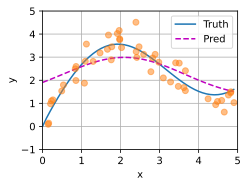

In [23]:
# X_repeat的形状:(n_test,n_train),
# 每一行都包含着相同的测试输入（例如：同样的查询）
X_repeat = x_test.repeat_interleave(n_train).reshape((-1, n_train))
# x_train包含着键。attention_weights的形状：(n_test,n_train),
# 每一行都包含着要在给定的每个查询的值（y_train）之间分配的注意力权重
attention_weights = nn.functional.softmax(-(X_repeat - x_train)**2 / 2, dim=1)
# y_hat的每个元素都是值的加权平均值，其中的权重是注意力权重
y_hat = torch.matmul(attention_weights, y_train)
plot_kernel_reg(y_hat)